In [53]:
import numpy as np

def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

def derivative(y,x,w, i) :
    ret = -y * x[i] * sigmoid(-y*np.sum(x*w))
    return ret

class GradDescenter:
    
    def __init__(self, x, y, w, dimx):
        self.x = x
        self.y = y
        self.w = w
        self.n = 0
        self.order = len(x)
        self.dimx = dimx
    
    def step(self, n):
        print(n)
        next_w = self.w -  1/np.sqrt(n + 1) * self.grad()
        eps = np.linalg.norm(next_w - self.w)
        self.w = next_w
        return eps
    
    def grad(self):        
        g = np.array([self.deriv(i) for i in range(0, self.dimx)])
        for i in g:
            print(i)
        return g    
    
    def deriv(self, i):        
        terms = [derivative(self.y[k], self.x[k], self.w, i) for k in range(0, self.order)]                
        res = np.sum(terms)
        return res
    
    def findmin(self, eps):
        err = np.inf
        n = 0
        while err > eps:
            err = self.step(n)
            n = n + 1
            linw = lin(self.w)              
            xs = range(0, 10)
            plt.plot(xs,[linw(x) for x in xs])
        return n
    

0
-25.60478421091924
142.76316321841847
568.1028986411566
1
23.0
-95.60914520080577
-434.865106902138
2
23.0
-95.60914520080577
-434.865106902138
3
22.998260550332517
-95.60833165248086
-434.86457957278924
4
-27.0
144.52945650011247
575.2107652289424
5
22.999999999941053
-95.60914520076857
-434.8651069021315
6
-26.999999999999844
144.52945650011236
575.2107652289424
7
23.0
-95.60914520080577
-434.865106902138
8
-26.999405057138215
144.52907973903842
575.2107017814715
9
23.0
-95.60914520080577
-434.865106902138
10
-24.132478515514883
142.1939724864981
571.8072880894315
11
23.0
-95.60914520080577
-434.865106902138
12
22.99999999998693
-95.60914520079966
-434.865106902134
13
-26.999906929001654
144.52939756078968
575.2107553034189
14
23.0
-95.60914520080577
-434.865106902138
15
-26.00524694040179
143.899507206434
575.1046793517685
16
23.0
-95.60914520080577
-434.865106902138
17
22.98916153063702
-95.6012490315321
-434.8175824372463
18
-26.99999530324847
144.52945352578791
575.210764728059

/home/danm/scipy_venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


35
23.0
-95.60914520080577
-434.865106902138
36
-25.8827514772522
143.8455259783936
575.0636145959677
37
23.0
-95.60914520080577
-434.865106902138
38
21.140237477436198
-94.20027424894697
-426.78326544534195
39
-26.00015462158361
143.8962817138265
575.1041370738366
40
22.999999999761055
-95.60914520070254
-434.86510690205546
41
-25.99998829832717
143.89617875165374
575.1041165283616
42
22.999999999999993
-95.60914520080577
-434.865106902138
43
-25.451638188373813
143.65926127094582
574.914677288149
44
23.0
-95.60914520080577
-434.865106902138
45
21.12638922058665
-94.18982415032796
-426.7298769190876
46
-26.000001788892927
143.89618492972033
575.1041207742592
47
22.999999999801293
-95.60914520071994
-434.86510690206933
48
-25.99982087549658
143.89610640478156
575.1040587016396
49
22.999999999999993
-95.60914520080577
-434.865106902138
50
-25.11679913702881
143.51346382026412
574.7956644956064
51
23.0
-95.60914520080577
-434.865106902138
52
21.115931671730586
-94.18190503339109
-426.689

219
21.00059085050537
-94.09409748276319
-426.24214078137004
220
-24.000248419451985
142.1371169554214
571.767795765704
221
22.999999959728676
-95.60914517044857
-434.865106711037
222
-14.286258006830293
84.0936090265891
346.48195672099905
223
21.999808548597116
-94.85517154108076
-430.1188851812019
224
-24.000037073191056
142.1370256419628
571.7677227502567
225
22.999999999999762
-95.60914520080568
-434.8651069021379
226
1.2780999345395374
-20.073933804598816
-87.6269613707482
227
-23.32931314840515
139.42772290775827
561.7963079956878
228
22.999999999999943
-95.60914520080577
-434.865106902138
229
10.43580105494484
-67.31914807568604
-297.34254981087656
230
-24.00095215224655
142.13742101090784
571.7680388974406
231
22.004780984137206
-94.85892142753222
-430.1423132917487
232
-24.000008330539742
142.1370131777269
571.7677125736179
233
22.999999999999925
-95.60914520080574
-434.865106902138
234
8.189365096509935
-54.47849100143055
-238.49571731399604
235
-24.000158911164533
142.137078

-322.85591995069103
376
-24.00000013163052
142.13700968102484
571.7677099871239
377
21.00727984395406
-94.09919253650294
-426.26809357754905
378
-8.989608122809996
45.516321055502964
189.5112782023612
379
13.737944339359691
-78.80272945373964
-351.8901367111687
380
-24.000000136166125
142.13700968323874
571.7677099901987
381
21.000294210477797
-94.09387178581146
-426.2409908664255
382
-11.024061039116443
58.35380398000598
242.03842107960358
383
17.87411868052066
-89.00162885594791
-401.1271469491219
384
-24.00000013852011
142.13700968432522
571.7677099914238
385
21.000023004081825
-94.09366510252649
-426.23993819068335
386
-12.981520603388047
72.31545393622305
298.74156418243217
387
19.970970540842956
-93.04156492714482
-421.1585550252804
388
-24.000000054234192
142.13700964646006
571.7677099537127
389
21.00385074126682
-94.09658069284613
-426.2547894287428
390
-7.957227751515813
39.48089969467267
164.68217072062495
391
11.370471012855711
-70.97298616958166
-314.2197905935095
392
-24.0

548
-23.06618634709305
138.38307371463335
557.9585152814698
549
20.143676383193423
-93.23073110759118
-422.0721022189922
550
-5.946546497719696
30.9018392426128
129.71104424043148
551
9.542969706243053
-62.632532250193364
-275.8264362949501
552
-23.724553664556396
141.03040870912344
567.697227142703
553
20.1895852137827
-93.27699339778188
-422.2955415780565
554
-5.143909648478309
26.03580429724644
109.45143111198541
555
8.00000332597218
-53.150965336979766
-232.3908350555701
556
-21.171447747805008
130.53905222163922
528.7615382156184
557
20.008602917504717
-93.09461768917613
-421.4146964821523
558
-7.064215078750824
38.84671922005721
162.91769851028602
559
10.999839598947549
-69.87751134795566
-309.07154838361726
560
-23.995774512063573
142.12016366363713
571.7057695475595
561
20.033217250040682
-93.11942153149128
-421.5344950179875
562
-6.053483137472922
31.677174051484663
132.9575525113779
563
9.64986038950149
-63.25820657413719
-278.69919641642434
564
-23.299713929684067
139.323317

713
18.253020711389336
-89.84417493140988
-405.3275059163162
714
-7.51811559410405
41.86303108746769
175.3942056836209
715
9.106635958584317
-60.078446528439585
-264.09945606140013
716
-16.79805775312258
105.74609788880383
432.48908900649104
717
16.017204802767488
-84.93464045348041
-381.3840792442876
718
-10.929339096358808
63.283998065236695
262.87048902281197
719
11.000000000005704
-69.87824437541292
-309.0749108235975
720
-13.54860703621939
82.33541507523046
339.98625449484143
721
11.000958518159651
-69.88107673451705
-309.088221805894
722
-13.045214560551695
81.41475005801831
336.6806293309485
723
12.028909360143054
-72.93285592190834
-323.44280348078246
724
-10.304814576332472
59.23963269208798
246.4941361830266
725
10.999999785574218
-69.87824339553865
-309.0749063288555
726
-18.566832115760658
118.29671002831199
481.855794556886
727
18.000035280462647
-89.2833061539696
-402.4993541072055
728
-8.876139706430385
51.61102114343237
215.6242602050428
729
10.99745135606041
-69.866595

-309.0730514226225
890
-13.000837242225854
81.51748509059318
337.1536290877791
891
11.000000000118327
-69.87824437569653
-309.07491082490014
892
-11.3453671152445
66.95020397696385
277.8464371389087
893
10.999751800867902
-69.8771099747159
-309.0697072151389
894
-13.000752778269252
81.51742606128839
337.15346626660835
895
11.00000000005828
-69.87824437551896
-309.0749108240657
896
-11.570558922623697
68.63024934538171
284.6783969018527
897
10.99999555544187
-69.87822406137813
-309.0748176410692
898
-13.000416528339805
81.51719105144531
337.1528180152353
899
11.000000000814307
-69.87824437775312
-309.07491083456523
900
-10.019033723216381
57.597997306158
239.87598200148994
901
8.998593131459073
-59.443671962214694
-261.18542865083646
902
-12.99977754222391
81.51301394421877
337.13600699089386
903
11.000000044135358
-69.87824450576373
-309.07491143616517
904
-9.582105290129167
55.44458432050402
231.188612265333
905
8.994690725704311
-59.41963389686062
-261.07532094120234
906
-12.99937616

1035
7.999997080448068
-53.15091969183994
-232.39062627530976
1036
-9.97231796658886
57.34533146683813
238.85566491229594
1037
8.000000478851042
-53.150941609088164
-232.39072513114084
1038
-9.233282863208403
53.74708213415137
224.34151011556156
1039
7.999994801916206
-53.15090494188389
-232.3905599019677
1040
-9.972157069938772
57.344610671996385
238.85276279026107
1041
8.000000257862627
-53.150940215599576
-232.39071875630637
1042
-9.234080804772107
53.750965656078236
224.35717489647953
1043
7.9999908759823875
-53.150879527445575
-232.3904455396688
1044
-9.971764105299012
57.342744612318214
238.84524016427497
1045
8.000000134347324
-53.1509394361202
-232.39071519221747
1046
-9.234015164172042
53.75064641701659
224.35588722731163
1047
7.99998388236794
-53.150834254350514
-232.39024181558452
1048
-9.971553132044992
57.341782353810004
238.84136444027106
1049
8.000000058964979
-53.15093895930369
-232.3907130151874
1050
-9.23461825420189
53.753581646368424
224.3677269270063
1051
7.9999718

1173
7.00358314580731
-46.70061697260022
-203.36495510467174
1174
-8.382196607231904
47.772460543561124
199.77344409625056
1175
7.000195266926018
-46.67869223625121
-203.2662982532113
1176
-8.919964329654176
51.98482289576431
217.1724747600388
1177
7.986251291278796
-53.06193607311403
-231.99020951987805
1178
-9.020366309758145
52.71089521152906
220.16189983752952
1179
7.002770247221943
-46.69535477658562
-203.34127582323438
1180
-8.303102330937321
47.15308474091147
197.2151378854747
1181
6.999980522551783
-46.67733100985182
-203.2601854499586
1182
-8.990349227915932
52.536146154025836
219.4496944403354
1183
7.977336382337544
-53.00422524421127
-231.7305169695604
1184
-9.015206200298444
52.68578273080994
220.06060497591852
1185
7.001968405678541
-46.6901642607912
-203.31791912615634
1186
-8.252315663363756
46.75547376284909
195.5728254445458
1187
6.999847340591413
-46.67654790793985
-203.25670733327618
1188
-8.997543391499603
52.59244931858375
219.6822452247314
1189
7.897013636394823
-

-29.22199307546904
-126.0439610634039
1356
-4.451416106318016
23.59401043241194
99.47787864609427
1357
3.2171878610798164
-25.368475063047335
-109.40745733419324
1358
-6.807504316163732
37.59792770603282
157.77444027839553
1359
5.767914125689212
-38.94991727025697
-168.9347781670851
1360
-6.999276849671516
38.749235472663756
162.568329551665
1361
4.584298275491981
-31.4676606718898
-135.80287827941214
1362
-4.061356800948305
22.33514726846466
94.35281555476251
1363
3.3746996440997883
-26.14310935583226
-112.75166171425087
1364
-6.941752400789385
38.43801874139616
161.27618118744908
1365
5.915358245520922
-39.98586903762248
-173.53574299093106
1366
-7.000177368840084
38.75332561589389
162.58511230791862
1367
4.232009876251028
-30.09638228489681
-129.84045356877692
1368
-4.019937191465181
22.204819042593677
93.82287141810828
1369
3.70483583564236
-27.767225782912845
-119.76332496926634
1370
-6.994612865227067
38.730587354459686
162.4917059439644
1371
5.17386999823005
-34.71454765486096
-

1528
-4.757147703945763
25.839011184383416
108.87025465518319
1529
3.1471099538456504
-25.023232989822404
-107.9168544831407
1530
-4.463713625119096
24.19170023268802
102.02314557774461
1531
3.002244710182305
-24.315139082607917
-104.86095685047596
1532
-5.308119573261481
29.200597711969024
122.87385875928001
1533
3.9954169146928273
-29.196859905000927
-125.93539273747541
1534
-6.406394797379603
35.81783824002106
150.4303338193952
1535
4.052836274141803
-29.418706586961473
-126.8979785476054
1536
-3.998978323037157
22.131976770621712
93.52472802671697
1537
3.6244938482375875
-27.371816244916317
-118.05621672362865
1538
-6.515016557480498
36.4470765354394
153.04791151211174
1539
4.118049200319016
-29.664692878203518
-127.9659113742955
1540
-3.996402633470643
22.11375156547627
93.44776686247167
1541
3.7298818858496343
-27.890351467397686
-120.29486388841
1542
-6.712592054606613
37.51094075031983
157.4644273612879
1543
4.336425662485087
-30.48850633049347
-131.54246038577935
1544
-3.99775

1662
-4.0445385465740635
22.327218307112012
94.32983278040761
1663
2.9561747421906683
-24.138119018856923
-104.10862581153428
1664
-6.1402653063677946
35.10253495381218
147.54719081398306
1665
4.002284329180858
-29.228025594049313
-126.07015079719991
1666
-4.000491080372392
22.143847100868605
93.57499943185077
1667
3.045282657144737
-24.522309185082225
-105.75426223842237
1668
-4.039697593805032
22.306834173760286
94.24588998511666
1669
2.956571184405785
-24.13957097066229
-104.11477471386371
1670
-6.100269892581866
34.92000972404544
146.7934118973014
1671
4.0016027935534435
-29.225454594464182
-126.05898902188416
1672
-4.000630740207904
22.144437353472508
93.5774417992726
1673
3.029033434030665
-24.442560694544717
-105.41001629239871
1674
-4.043893813624168
22.33067511829825
94.3450187157797
1675
2.9515908546551533
-24.1212638197369
-104.03722462969753
1676
-6.115644843552593
35.03505314646743
147.27487534541814
1677
4.001728643042264
-29.225929340803535
-126.06105009295696
1678
-4.00

1806
-4.700872738183602
26.871439550426402
113.31805321026222
1807
3.0156209708965656
-24.37642534598068
-105.12445911107446
1808
-4.006340452574514
22.17148875759871
93.68931891482165
1809
2.9605559744699113
-24.154068730504356
-104.17615154656775
1810
-5.299416536194326
30.831934445562872
129.8493162288
1811
3.97232592018252
-29.083240811496413
-125.44486901496539
1812
-4.156166047533506
23.156000547359262
97.79818914991725
1813
2.9292523864116653
-24.038749851573684
-103.68763142949796
1814
-5.593266510599241
32.66958651394291
137.50890084153656
1815
3.999076511930552
-29.21485452484656
-126.01308052898776
1816
-4.005125759904498
22.165636876079944
93.66510698806505
1817
2.9643016852609585
-24.167830368961614
-104.23444374858327
1818
-5.199066677896102
30.209793566952964
127.25666899880852
1819
3.902439121619353
-28.73936673490889
-123.96027455778119
1820
-4.255688228645253
23.845340872312043
100.67867822671002
1821
2.9658440278450713
-24.17349625882927
-104.25844351678539
1822
-5.1

1941
2.8721317298377413
-23.757541876748938
-102.48520025682393
1942
-5.21039685939738
30.514952201878426
128.55322599878758
1943
3.709516632333913
-27.7900942502934
-119.86201504632346
1944
-4.010559171097901
22.20900518483655
93.84686331225257
1945
2.8908272151960146
-23.84638456329131
-102.86470913288387
1946
-5.186548474040251
30.364000205914035
127.92385041053647
1947
3.6365037419712296
-27.430836426277736
-118.31100460369635
1948
-4.005695967343624
22.17693273199926
93.71299689964243
1949
2.920127153366556
-23.981221373029136
-103.44015270801818
1950
-5.108062178083484
29.85131793753453
125.78461737723372
1951
3.393569206082537
-26.235488102363217
-113.15037273025233
1952
-4.000937646114954
22.147191364950103
93.5890225287294
1953
2.9750760894976813
-24.206385142182747
-104.39758818617457
1954
-4.518612672847735
25.80428536706805
108.87745165603334
1955
2.9958831369007806
-24.284226569582994
-104.72759439437526
1956
-4.037647247689284
22.397102297626454
94.63289731135997
1957
2.8

103.1483505975181
2077
2.9514134879306946
-24.030692285847216
-103.63933681255733
2078
-4.372339171218745
24.82296558601339
104.77998983884149
2079
2.9742962771668116
-24.17891716885307
-104.27734250128397
2080
-4.258023372555011
23.999677295151592
101.33676095764127
2081
2.878800176930849
-23.445759633628406
-101.1113240828539
2082
-4.204293276595017
23.612095675151934
99.7157227449454
2083
2.715057865264661
-21.991050720478206
-94.8144411604498
2084
-4.007421587774006
22.193528821817566
93.78278435296092
2085
2.499497968922811
-20.013624320371804
-86.25083068943911
2086
-4.000084883589037
22.143038683872884
93.57183355691384
2087
2.9910612673410486
-24.263786048699238
-104.64052224484995
2088
-4.062681940378057
22.58991393487251
95.44043853556815
2089
2.046405868033982
-15.926427588130391
-68.5548708690606
2090
-3.8965062192906204
21.37658548594546
90.33066328736773
2091
3.033849323008622
-24.465568292074213
-105.5091809479164
2092
-4.000044663504919
22.14283095421852
93.570971092055

2216
-2.9803846404150103
14.738297599179987
62.26528096969678
2217
1.9510804786097367
-14.517891813363883
-62.42111263320396
2218
-2.9825770577074664
14.753052529893335
62.32762174819169
2219
1.9498880184002996
-14.50319937785817
-62.35724745635972
2220
-2.978178922757202
14.727526205720253
62.22001219918303
2221
1.9448537100295775
-14.459730790843487
-62.169174113073474
2222
-2.969698580885837
14.677807225912936
62.01037258851911
2223
1.9382036688017727
-14.405051626616189
-61.932781677659236
2224
-2.960006980430049
14.62198873720283
61.77506766555028
2225
1.9319593231784182
-14.354447374860383
-61.71405914599697
2226
-2.951234317999791
14.572665845783328
61.56721409114873
2227
1.92684987027203
-14.312953251546858
-61.53470696316599
2228
-2.943887386241832
14.532327845677814
61.39728248160536
2229
1.922664938453021
-14.27870841461706
-61.38667076810039
2230
-2.937597739938606
14.49849898097981
61.25481591948782
2231
1.919048400729412
-14.248983479500737
-61.25816472101333
2232
-2.9319

KeyboardInterrupt: 

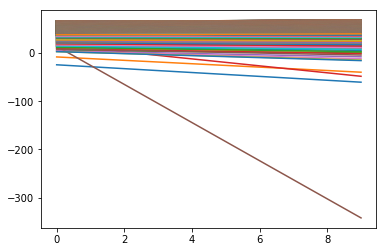

In [55]:
from numpy import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def genDividible2d(begin, end, size):

    xs = rnd.uniform(begin, end, size)   
        
    k = rnd.uniform(begin, end)
    
    bias = rnd.uniform(-k * xs[-1], k * xs[-1], size)    
    
    y = xs * k
    biased = y + bias
    y_1 = []
    y_2 = [] 
    
    x_1 = []
    x_2 = []
    for i in range(0, size):
        if y[i] > biased[i]:
            y_1.append(biased[i])
            x_1.append(xs[i])
        else:
            y_2.append(biased[i])
            x_2.append(xs[i])        
    negones_1 = [-1 for x in x_1]
    negones_2 = [-1 for x in x_2]
    return np.stack((negones_1, x_1, y_1),axis=-1), np.stack((negones_2, x_2, y_2),axis=-1)

def genUndividable2d(begin, end, size):
    xs = rnd.uniform(begin, end, size)
    
    k = rnd.uniform(begin, end)    
    bias = rnd.uniform(-k * xs[-1], k * xs[-1], size)    
    
    y_1 = xs * k + bias
    y_2 = xs * k - bias
    negones = [-1 for xs in xs]
    return np.stack((negones, xs, y_1), axis=-1), np.stack((negones, xs, y_2),axis=-1)
    
def lin(w):
    def linw(x):
        return -x*w[2]/w[1] - w[0]
    return linw

x1, x2 = genDividible2d(0, 10, 50)

y1 = [-1 for x in x1]
y2 = [1 for x in x2]

y = np.concatenate((y1, y2))
x = np.concatenate((x1, x2))
w=  [-1, 1, 0]

gd = GradDescenter(x, y, w, 3)
gd.findmin(0.1)

xs = range(0, 10)

linw = lin(gd.w)
print(gd.w)
#plt.plot(xs,[linw(x) for x in xs])

plt.show()
    
        
    

    